# Elaboration of a Nutri-score model based in a ML classifier

For this model, we used several classifier and we assess the best one using accuracy. Finally we define the function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
import xgboost as xgb
from matplotlib.colors import ListedColormap
import graphviz
import seaborn as sns 
%matplotlib inline 
sns.set(color_codes=True)

# Cleaning the dataset

In [3]:
#We import the dataset and set the right index
raw_df=pd.read_excel('openfoodfacts_simplified_database.xlsx')
raw_df=raw_df.set_index('product_name')
raw_df.head()

,brands,categories,stores,countries,allergens,additives_n,additives_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
product_name,,,,,,,,,,,,,,,,,,,
Les Ã©vasions Poulet Satay et son riz,"Les Ã‰vasions,Carrefour","Plats prÃ©parÃ©s,Produits Ã la viande,Plats p...","Carrefour Market,Carrefour",France,"en:gluten,en:peanuts,en:soybeans",1.0,en:e150a,b,4.0,Composite foods,One-dish meals,590.0,0.5,5.5,1.8,6.2,0.236,0.0,0.0
Haricots verts extra-fins,Carrefour,NaN,Carrefour,en:france,NaN,0.0,NaN,NaN,NaN,unknown,unknown,94.0,NaN,1.0,2.8,1.6,0.136,NaN,NaN
Pommes Ã dipper,Carrefour,Pommes de terre prÃ©frites surgelÃ©es,Carrefour,"France,Espagne",NaN,4.0,"en:e14xx,en:e415,en:e450,en:e450i,en:e500",NaN,4.0,Cereals and potatoes,Potatoes,611.0,0.6,NaN,4.8,2.3,0.240,NaN,NaN
VeloutÃ© de LÃ©gumes,carrefour,Soupes de lÃ©gumes dÃ©shydratÃ©es,Carrefour,France,"en:celery,en:gluten,en:milk",NaN,NaN,b,NaN,Fruits and vegetables,Soups,1477.0,1.5,10.0,9.9,5.4,2.200,1.0,1.0
jus de pomme,Carrefour,"Boissons, Aliments et boissons Ã base de vÃ©g...",Carrefour,France,NaN,NaN,NaN,c,NaN,Beverages,Fruit juices,176.0,0.0,9.7,0.0,0.5,0.000,3.0,-3.0


In [4]:
#We drop NA and non useful columns
features=['energy_100g','saturated-fat_100g','sugars_100g','fiber_100g','proteins_100g','sodium_100g']
label=['nutrition_grade_fr']
df=raw_df[features+label]
df=df.dropna()
df.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition_grade_fr
product_name,,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236,b
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200,b
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000,c
Fingers de Poulet,1022.0,1.9,0.5,1.4,12.0,0.332,b
Orange Jus Ã base de concentrÃ©,196.0,0.0,11.0,0.5,0.7,0.040,c


In [5]:
#We replace letters by numbers to apply ML models
df=df.replace(['a','b','c','d','e'],[0,1,2,3,4])
df.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,nutrition_grade_fr
product_name,,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236,1
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200,1
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000,2
Fingers de Poulet,1022.0,1.9,0.5,1.4,12.0,0.332,1
Orange Jus Ã base de concentrÃ©,196.0,0.0,11.0,0.5,0.7,0.040,2


In [6]:
#Definition of features
X=df[features]
X.head()

,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g
product_name,,,,,,
Les Ã©vasions Poulet Satay et son riz,590.0,0.5,5.5,1.8,6.2,0.236
VeloutÃ© de LÃ©gumes,1477.0,1.5,10.0,9.9,5.4,2.200
jus de pomme,176.0,0.0,9.7,0.0,0.5,0.000
Fingers de Poulet,1022.0,1.9,0.5,1.4,12.0,0.332
Orange Jus Ã base de concentrÃ©,196.0,0.0,11.0,0.5,0.7,0.040


In [7]:
#Definition of labels
y=df[label]
y.head()

,nutrition_grade_fr
product_name,
Les Ã©vasions Poulet Satay et son riz,1
VeloutÃ© de LÃ©gumes,1
jus de pomme,2
Fingers de Poulet,1
Orange Jus Ã base de concentrÃ©,2


In [8]:
#We split our dataset into training, validation and testing values.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.6,random_state=5)

In [9]:
#Here are the size of each subset.
print('Train set:',X_train.count()[0])
print('Validation set:',X_val.count()[0])
print('Test set:',X_test.count()[0])

Train set: 3395
Validation set: 360
Test set: 240


# Exploratory Data Analysis

Let's have a look at our data and how are their distributed.

<AxesSubplot:xlabel='energy_100g'>

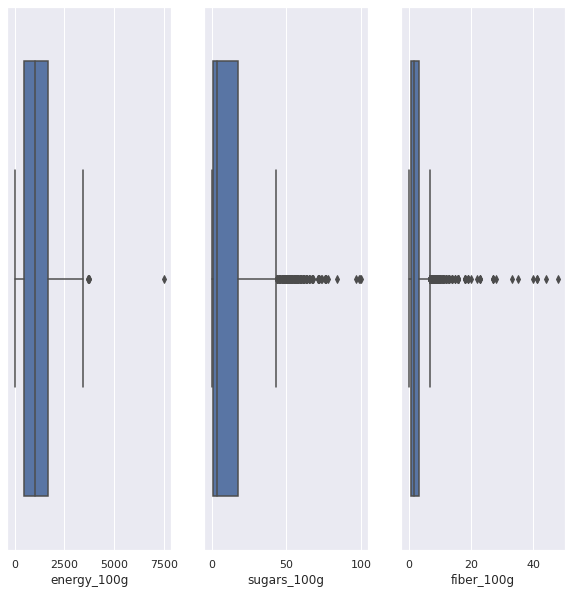

In [35]:
#We plot values to detect outliers.
fig, ax =plt.subplots(1,3)
sns.boxplot(x=X["sugars_100g"],ax=ax[1])
sns.boxplot(x=X["fiber_100g"],ax=ax[2])
sns.boxplot(x=X["energy_100g"],ax=ax[0]) 



<AxesSubplot:xlabel='sodium_100g'>

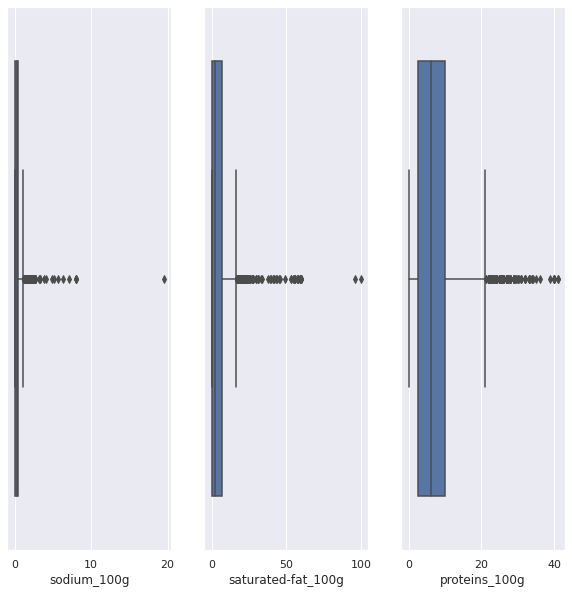

In [36]:
#We plot values to detect outliers.
fig, ax =plt.subplots(1,3)
sns.boxplot(x=X["saturated-fat_100g"],ax=ax[1])
sns.boxplot(x=X["proteins_100g"],ax=ax[2])
sns.boxplot(x=X["sodium_100g"],ax=ax[0]) 



                    energy_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
energy_100g            1.000000            0.616354     0.403484    0.268369   
saturated-fat_100g     0.616354            1.000000     0.222752   -0.012846   
sugars_100g            0.403484            0.222752     1.000000    0.077999   
fiber_100g             0.268369           -0.012846     0.077999    1.000000   
proteins_100g          0.247748            0.141973    -0.229817    0.138151   
sodium_100g            0.012350            0.014468    -0.191661   -0.029529   
nutrition_grade_fr     0.578302            0.595215     0.479908   -0.147826   

                    proteins_100g  sodium_100g  nutrition_grade_fr  
energy_100g              0.247748     0.012350            0.578302  
saturated-fat_100g       0.141973     0.014468            0.595215  
sugars_100g             -0.229817    -0.191661            0.479908  
fiber_100g               0.138151    -0.029529           -0.147826  
proteins_100g 

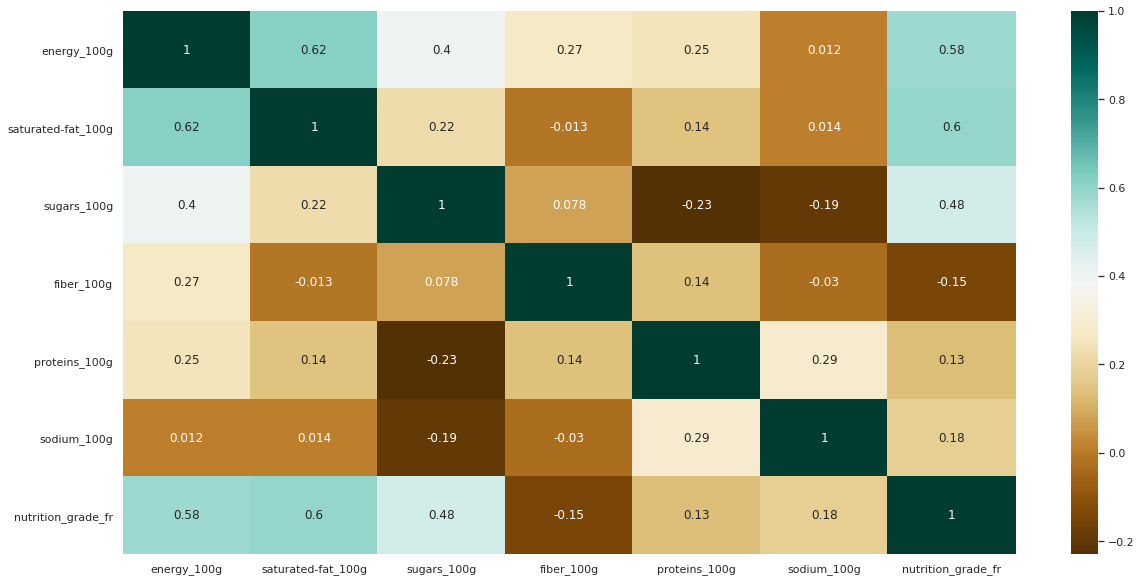

In [37]:
#We plot some heatmaps to see correlations
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
print(c)

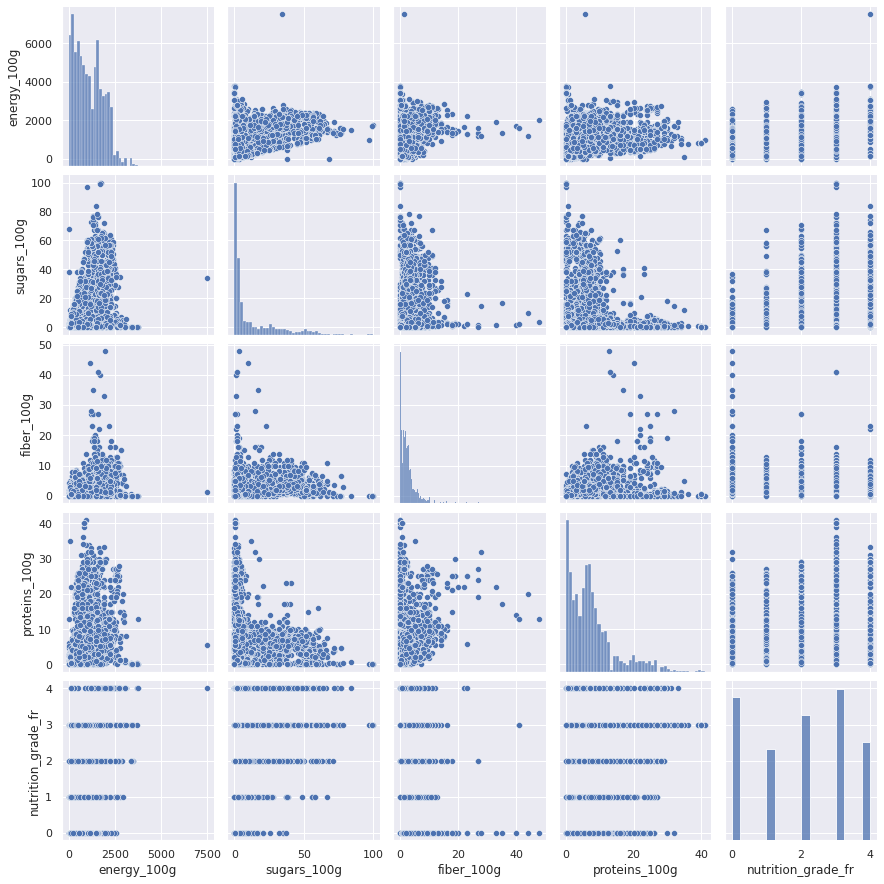

In [38]:
sns.pairplot(data = df, vars=['energy_100g','sugars_100g','fiber_100g','proteins_100g','nutrition_grade_fr'])
plt.show()

# Decision Trees

We implement the first ML model which is Decision Trees.

In [88]:
#We fit the model
modelDT=tree.DecisionTreeClassifier()
modelDT=modelDT.fit(X_train,y_train)

In [143]:
#We score the model
scoreDT= modelDT.score(X_val,y_val)
print("On the validation set, the DT model has a score of:",round(scoreDT,3)*100,"%")

On the validation set, the DT model has a score of: 79.2 %


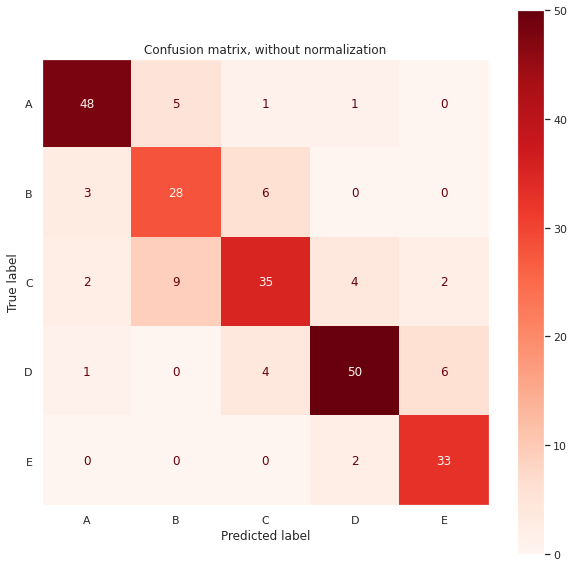

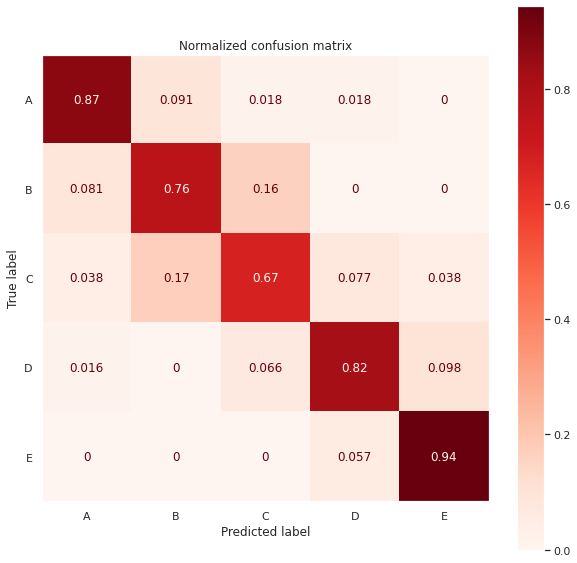

In [95]:
#For more accurate informations on the model's performance, we can plot confusions matrix.
plt.rcParams["figure.figsize"] = [10,10]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelDT, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

In [91]:
#We can also print the tree to understand how the classification was done. This part of the code give us a graphviz code
dot_data = tree.export_graphviz(modelDT, out_file=None, 
                 feature_names=features,  
                 class_names='nutrition_grade_fr',  
                 filled=True, rounded=True,  
                 special_characters=True)  

graph = graphviz.Source(dot_data) 

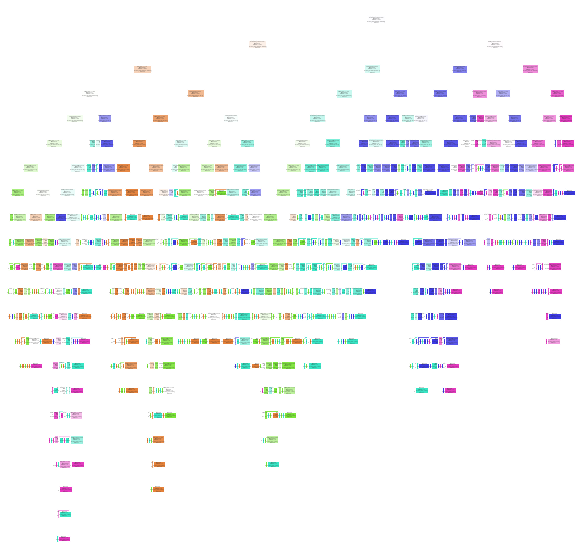

In [82]:
fig = plt.figure()
_ = tree.plot_tree(modelDT, 
                   feature_names=features,  
                   class_names='nutrition_grade_fr',
                   filled=True)
fig.savefig("decistion_tree.png")


In [144]:
#For comparision purpose, we will use cross validation. It also helps us solve some potential overfitting issues.
scoreDT=cross_val_score(modelDT,X_train,y_train,cv=5,scoring='accuracy').mean()
print('DT model has an average score of:',round(scoreDT,3)*100,"%")

DT model has an average score of: 78.9 %


# Random Forest

We implement the second ML model which is Random Forest.

In [10]:
#We fit our model, we make some changes in y_train to convert it to a 1d-Array
modelRF=RandomForestClassifier(random_state=0)
modelRF.fit(X_train,y_train.values.ravel())

RandomForestClassifier(random_state=0)

In [11]:
#We score the model
scoreRF=modelRF.score(X_val,y_val)
print("On the validation set, the RF model has a score of:",round(scoreRF,3)*100,"%")

On the validation set, the RF model has a score of: 85.6 %


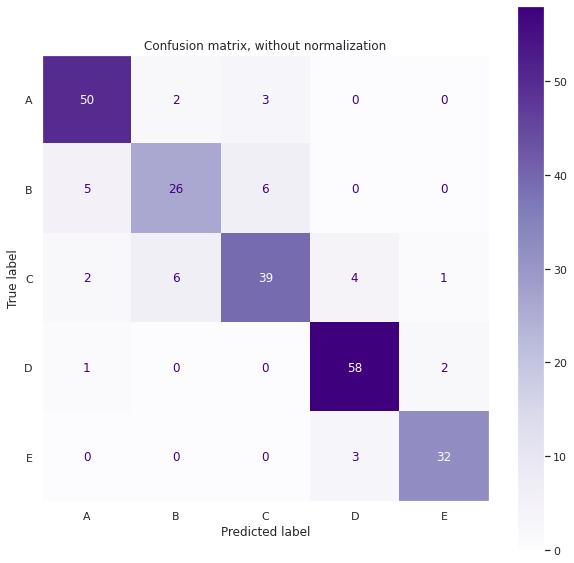

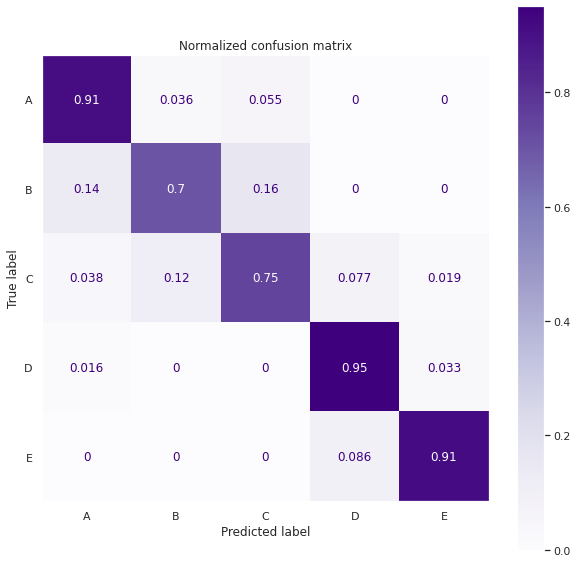

In [12]:
#For more accurate informations on the model's performance, we can plot confusions matrix.
plt.rcParams["figure.figsize"] = [10,10]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelRF, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Purples,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

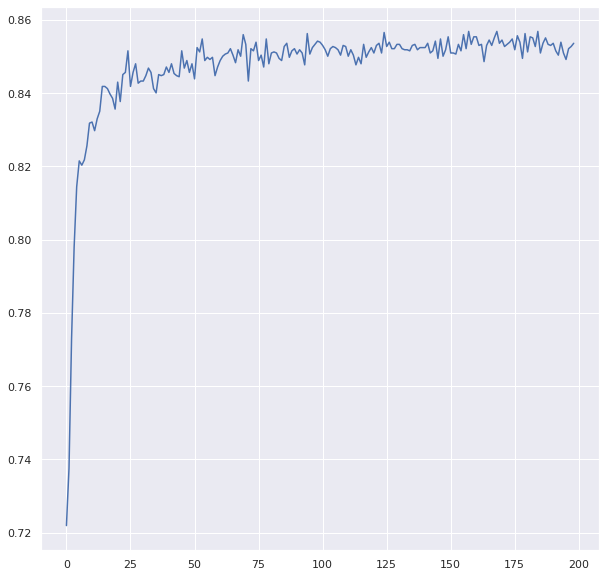

In [13]:
#However, we used the default value of n_estimators which is 100. 
#We can make our model more performant if we find the optimal value of n using cross validation/validation curve.
val_score=[]
for n in range(1,200):
    score=cross_val_score(RandomForestClassifier(n_estimators=n),X_train,y_train.values.ravel(),cv=5).mean()
    val_score.append(score)
plt.plot(val_score)


In [14]:
#The score does not significantly improve after n=75 so we can keep the default value.
#For comparision purpose, we will use cross validation.
scoreRF=cross_val_score(modelRF,X_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean()
print('RF model has an average score of:',round(scoreRF,3)*100,"%")

RF model has an average score of: 85.2 %


# K-Nearest Neighbours

Let's try another ML model. Although our data set is not very large (<100k values), let us try with this model.

In [148]:
# First we take k=30 then we will find a better value.
n_neighbors = 30
scoreKN=[]
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    modelKN = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    modelKN.fit(X_train, y_train.values.ravel())
    scoreKN.append(round(modelKN.score(X_val,y_val),3)*100)

print('The KNN model, for uniform and distance weights, has a score of:',scoreKN,"%")

The KNN model, for uniform and distance weights, has a score of: [52.2, 62.2] %


/home/abdou/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


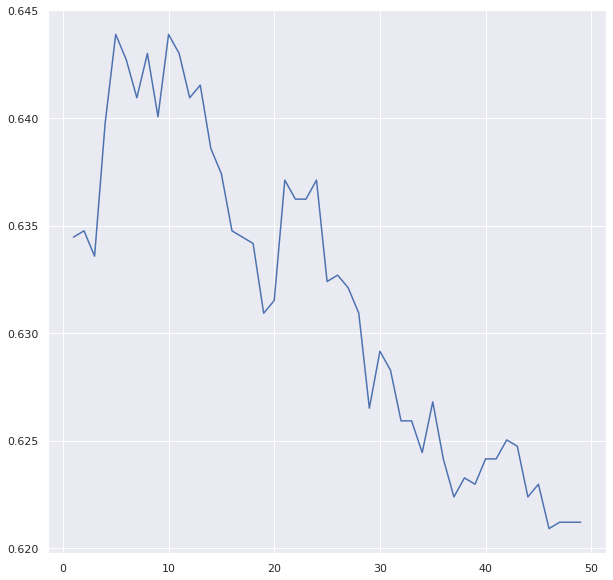

In [26]:
#We keep the distance weights. Let's find the optimal value of k with validation curve.
k=np.arange(1,50)
train_score, val_score=validation_curve(neighbors.KNeighborsClassifier(weights='distance'),X_train,y_train.values.ravel(),'n_neighbors',k,cv=5)
plt.plot(k,val_score.mean(axis=1))

We may find two optimal k. We can search the exact value with gridsearch and optmise our model. However, performances are still lower than previous ones (DT and RF). So we will not keep this model.

In [112]:
modelKN = neighbors.KNeighborsClassifier(n_neighbors=10, weights=weights)
modelKN.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10, weights='distance')

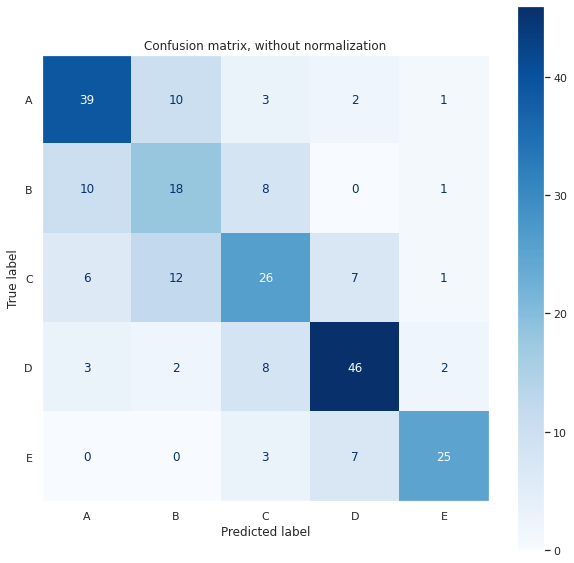

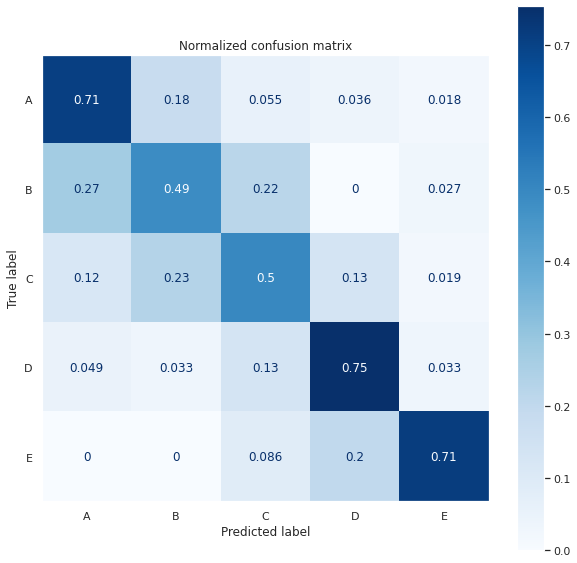

In [113]:
#For more accurate informations on the model's performance, we can plot confusions matrix.
plt.rcParams["figure.figsize"] = [10,10]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelKN, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

With the confusion matrix, we see that the KNN model is performant when identifying edges (extreme values like A, D, E). However, when classifying B and C products it is not performant.

# Support Vector Machine

We try a last classification model which is SVC.

In [116]:
#We fit our model
modelSVM=SVC(kernel='linear',C=0.025)
modelSVM.fit(X_train,y_train.values.ravel())

SVC(C=0.025, kernel='linear')

In [149]:
#We score the model
scoreSVM=modelSVM.score(X_val,y_val)
print("On the validation set, the SVM model has a score of:",round(scoreSVM,3)*100,"%")

On the validation set, the SVM model has a score of: 67.5 %


The score is quite similar to KNN because our dataset is not large enough.

# XGBoosting

The last model we will try in XGB which will combine several models.

In [15]:
#We fit our model
modelBoost = XGBClassifier()
modelBoost.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
scoreBoost = modelBoost.score(X_val,y_val)
print("On the validation set, the XGBoost model has a score of:",round(scoreBoost,3)*100,"%")

On the validation set, the XGBoost model has a score of: 85.3 %


In [17]:
#We fit the model with the parameters we want
param = {}
param['objective'] = 'multi:softmax'
param['num_class'] = 5
param['eta'] = 0.01
param['max_depth'] = 6
param['silent'] = 1
param['gamma'] = 0
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 1
param['max_delta_step'] = 0
param['subsample'] = 1
param['colsample_bytree'] = 1
param['lambda'] = 1
param['alpha'] = 0
param['seed'] = 0

modelBoost = XGBClassifier(param)
modelBoost.fit(X_train,y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

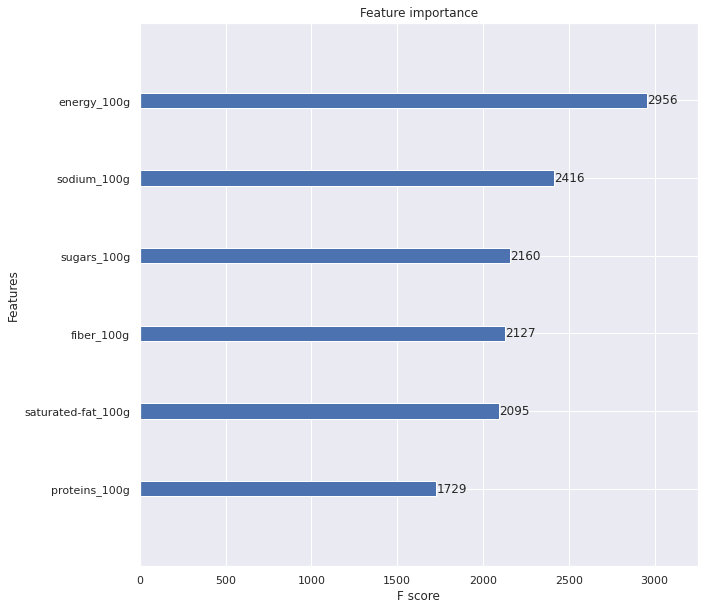

In [18]:
#We can plot the score of the features importances 
xgb.plot_importance(modelBoost)

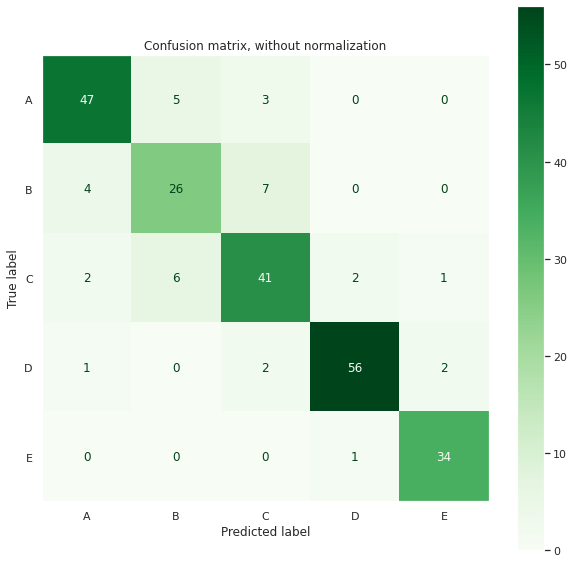

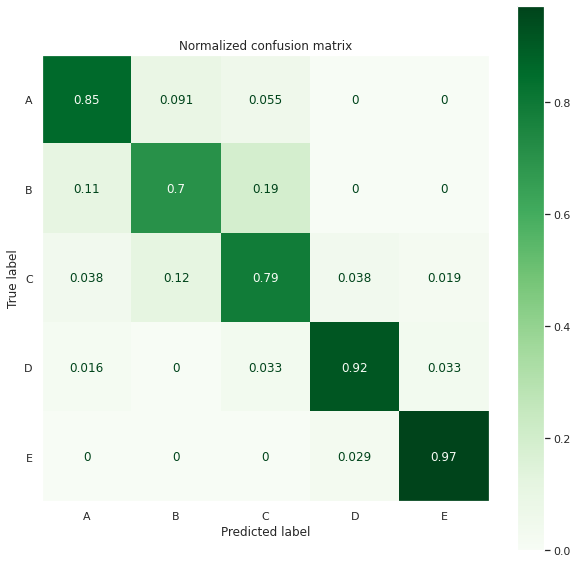

In [19]:
#For more accurate informations on the model's performance, we can plot confusions matrix.
plt.rcParams["figure.figsize"] = [10,10]

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelBoost, X_test, y_test,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Greens,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)

In [20]:
#For comparision purpose, we will use cross validation.
scoreXGB=cross_val_score(modelBoost,X_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean()
print('XGB model has an average score of:',round(scoreXGB,3)*100,"%")

XGB model has an average score of: 86.0 %


# Final Function

Let's choose first the best model between RF and XGB

In [22]:
#The objective is too have a model with maximal accuracy, precision and recall.
models=[modelBoost,modelRF]
modelname=['XGB','RF']
col=['Model','Accuracy','Precision','Recall']
tab=pd.DataFrame(columns=col)
tab['Model']=modelname
tab=tab.set_index('Model')
acc=[]
prec=[]
rec=[]

for model in models:
    acc.append(round(cross_val_score(model,X_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean()*100,2))
    prec.append(round(precision_score(y_test, model.predict(X_test), average='weighted')*100,2))
    rec.append(round(recall_score(y_test, model.predict(X_test), average='weighted')*100,2))
    
tab['Accuracy']=acc
tab['Precision']=prec
tab['Recall']=rec
tab.head()

,Accuracy,Precision,Recall
Model,,,
XGB,85.98,85.07,85.00
RF,85.15,85.16,85.42


We will keep the RF model. We may now build our function that will predict the class of each food.

In [66]:
def OtherMethodNutriScore(X):
    return modelRF.predict(X)

In [103]:
#Test table
test_df=pd.read_excel('OpenFood_Petales.xlsx')
test_df=test_df.set_index('productname')
features=['energy100g','saturatedfat100g','sugars100g','fiber100g','proteins100g','sodium100g']
label=['nutriscoregrade']
test=test_df[features+label]
test=test.dropna()
test=test.replace(['a','b','c','d','e'],[0,1,2,3,4])

Xt=test[features]
yt=test[label]

print('Size of our batch',Xt.size,'products.')

Size of our batch 1920 products.


In [112]:
yt_pred=OtherMethodNutriScore(Xt)
test['Predictions']=yt
print('Predictions done')

Predictions done


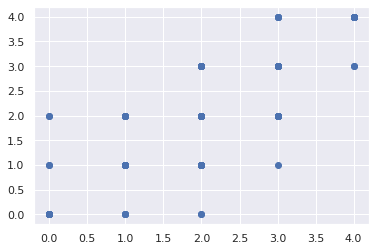

In [83]:
plt.scatter(yt, yt_pred)
plt.show()

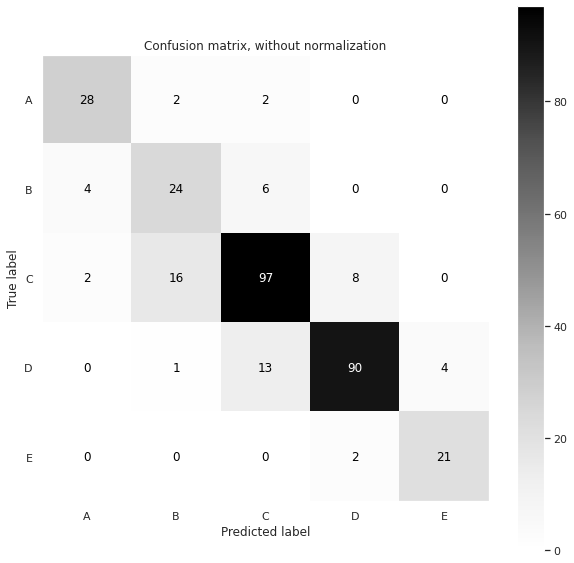

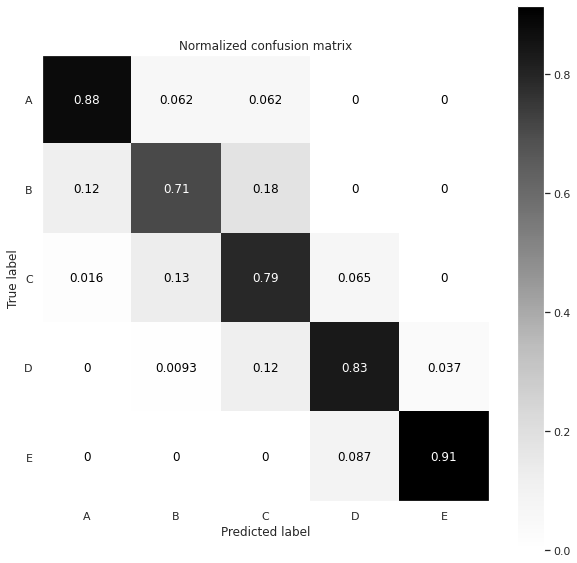

In [98]:
plt.rcParams["figure.figsize"] = [10,10]

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(modelRF, Xt, yt,
                                 display_labels=['A','B','C','D','E'],
                                 cmap=plt.cm.Greys,
                                 normalize=normalize)
    plt.grid(False)
    disp.ax_.set_title(title)